In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler

In [150]:
df=pd.read_csv("OnlineNewsPopularity.csv")

In [151]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [152]:
# The Names of the columns seems to have an extra space in the left side. So it is neccessary to remove that space.
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [153]:
columns=[]
for i in df.columns:
    i=i.lstrip()
    columns.append(i)

In [154]:
df.columns=columns

In [155]:
df.isnull().sum().mean()

0.0

In [156]:
#There are no null values present in any any of the columns and the datatypes seems to be correct for every feature.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [116]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [157]:
df['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [158]:
'''From the above description of each column we can see that the minimum value of n_tokens_content is 0.From this we 
can understand that there are articles with no content.

We have to remove those articles which don't have content, i.e data with n_tokens_content=0'''

# Removing rows with no content
df=df[df['n_tokens_content']!=0]

In [159]:
df['shares'].describe()

count     38463.000000
mean       3355.360398
std       11585.968776
min           1.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      843300.000000
Name: shares, dtype: float64

### Analyzing the Target variable (shares):
#### Shares feature is the number of shares the respective article got. This feature is continuous variable. This shares feature tells us the popularity of the article. 

In [118]:
df['shares'].describe()

count     38463.000000
mean       3355.360398
std       11585.968776
min           1.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      843300.000000
Name: shares, dtype: float64

<AxesSubplot:xlabel='shares', ylabel='Count'>

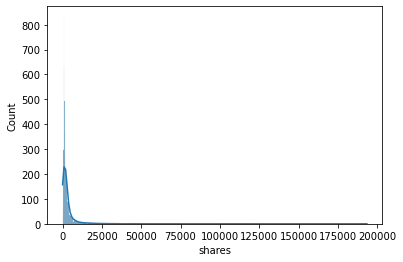

In [119]:
'''In the below plot, 5000 values are randomly sampled from 39444 values to plot the histplot so that it will be easy
to see the plot with less values.'''

sns.histplot(data=df, x=df['shares'].sample(n=5000, random_state=0), kde=True)

From the hisplot of shares feature, we can clearly see that the data is highly right skewed. By this we can understand
that for most of the articles the number of share are less than 10000. 

We have to transform the data into normal istribution using Log Normal transformation.

<AxesSubplot:xlabel='shares', ylabel='Count'>

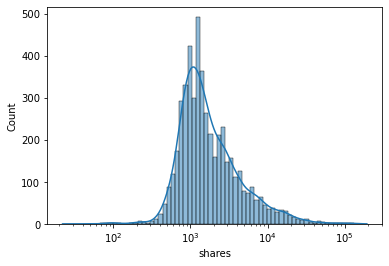

In [120]:
sns.histplot(data=df, x=df['shares'].sample(n=5000, random_state=0), kde=True, log_scale=True)

<AxesSubplot:xlabel='n_tokens_content', ylabel='Count'>

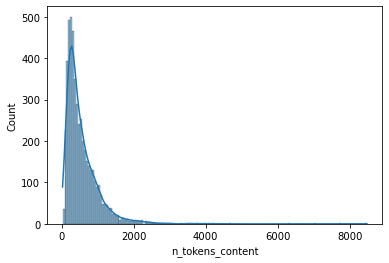

In [121]:
sns.histplot(data=df.sample(n=5000, random_state=0), x='n_tokens_content', kde=True)

<AxesSubplot:xlabel='n_tokens_content', ylabel='Count'>

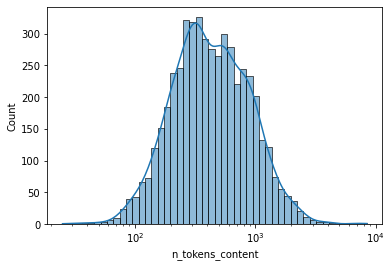

In [129]:
sns.histplot(data=df, x=df['n_tokens_content'].sample(n=5000, random_state=0), kde=True, log_scale=True)

#### Checking which category of articles has more popularity with more shares.

In [124]:
df["category"] = "lifestyle"
df.loc[df["data_channel_is_tech"] == 1, "category"] = "tech"
df.loc[df["data_channel_is_socmed"] == 1, "category"] = "socmed"
df.loc[df["data_channel_is_bus"] == 1, "category"] = "business"
df.loc[df["data_channel_is_entertainment"] == 1, "category"] = "Entertainment"
df.loc[df["data_channel_is_world"] == 1, "category"] = "World"

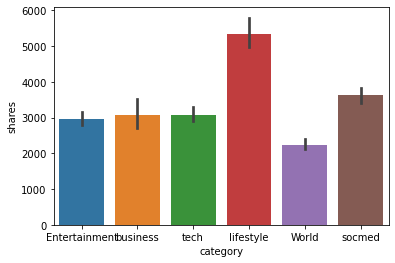

In [125]:
sns.barplot(y=df['shares'], x=df.category)    
plt.show()

#### Checking popularity based on the day published.

In [126]:
df['Day']='Sunday'
# Filter the data for Monday
df.loc[df['weekday_is_monday'] == 1, 'Day']='Monday'
df.loc[df['weekday_is_tuesday'] == 1, 'Day']='Tuesday'
df.loc[df['weekday_is_wednesday'] == 1, 'Day']='Wednesday'
df.loc[df['weekday_is_thursday'] == 1, 'Day']='Thursday'
df.loc[df['weekday_is_friday'] == 1, 'Day']='Friday'
df.loc[df['weekday_is_saturday'] == 1, 'Day']='Saturday'

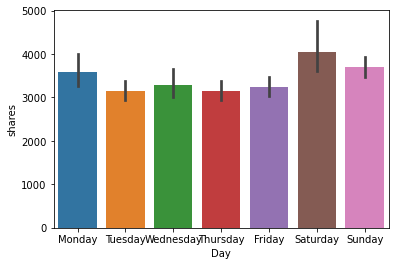

In [127]:
sns.barplot(y=df['shares'], x=df.Day)    
plt.show()
# From this plot, we can observe that the articles published in weekends has more popularity compared to normal days.

Comparing the Relationship between number of tokens to the popularity of articles.

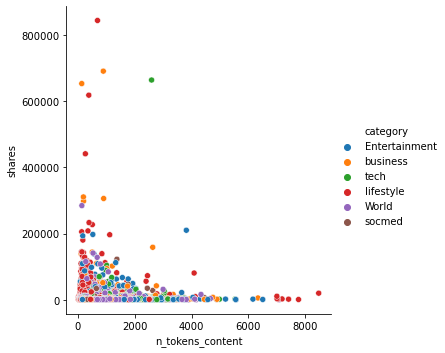

In [130]:
sns.relplot(data=df, y='shares', x='n_tokens_content', hue='category')

1. Here shares are dependent on the amount of content present in the articles. Articles with more tokens have shares. By this we can understand that people likes to share articles with less words.
2. By this we can assume that people likes to read articles with less content. For this we have to do more analysis.

<AxesSubplot:xlabel='n_tokens_content', ylabel='global_rate_positive_words'>

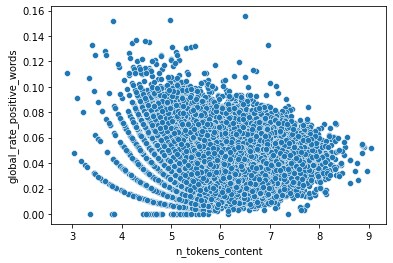

In [135]:
sns.scatterplot(data=temp, x='n_tokens_content', y='global_rate_positive_words')

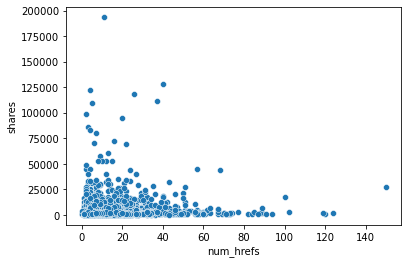

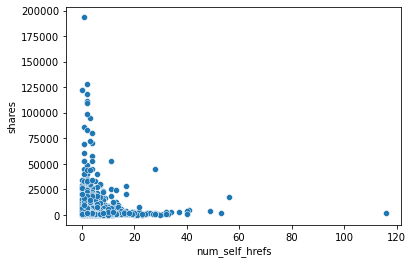

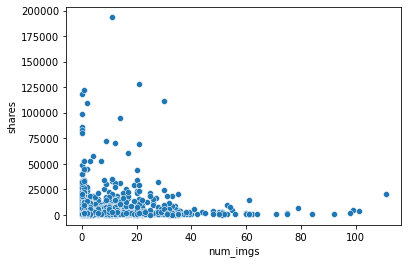

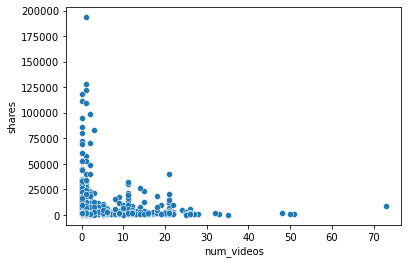

In [147]:
for col in df.columns[7:11]:
    sns.scatterplot(data=df.sample(5000, random_state=0), y='shares', x=col)
    plt.show()

<AxesSubplot:>

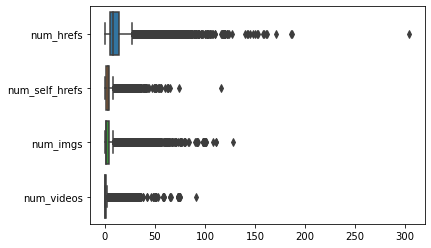

In [148]:
sns.boxplot(data=df[df.columns[7:11]], orient="h")